# Data Science with iris dataset
This exercise uses the Iris flower dataset to illustrate the steps involved in designing a predictive model to classify a flower based on the Sepal Length, Sepal Width, Petal length and Petal width.  The steps demonstrated involve
 1. Data import
 2. Initial Data Analysis
 3. Exploratory Data Analysis
 4. Modeling
     a. Feature analysis
     b. Model selection
 6. Model evaluation

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#format plot style
sns.set(style="white", color_codes=True)
%matplotlib inline

## Read data from UCI Machine learning Databases archive

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)

In [4]:
df.columns = ["sepal_length", 'sepal_width', 'petal_length', 'petal_width', 'Class']

## Initial Data Analysis

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.shape

(150, 5)

In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
print(df.groupby('Class').size())

Class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


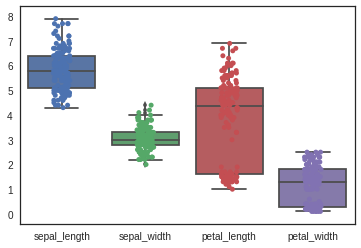

In [40]:
#Univariate Plot
ax = sns.boxplot(data=df)
ax = sns.stripplot(data=df, jitter=True,edgecolor="gray")

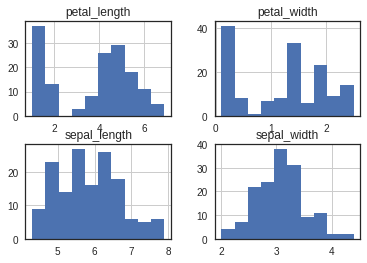

In [10]:
df.hist()
plt.show()

## Exploratory Data Analysis

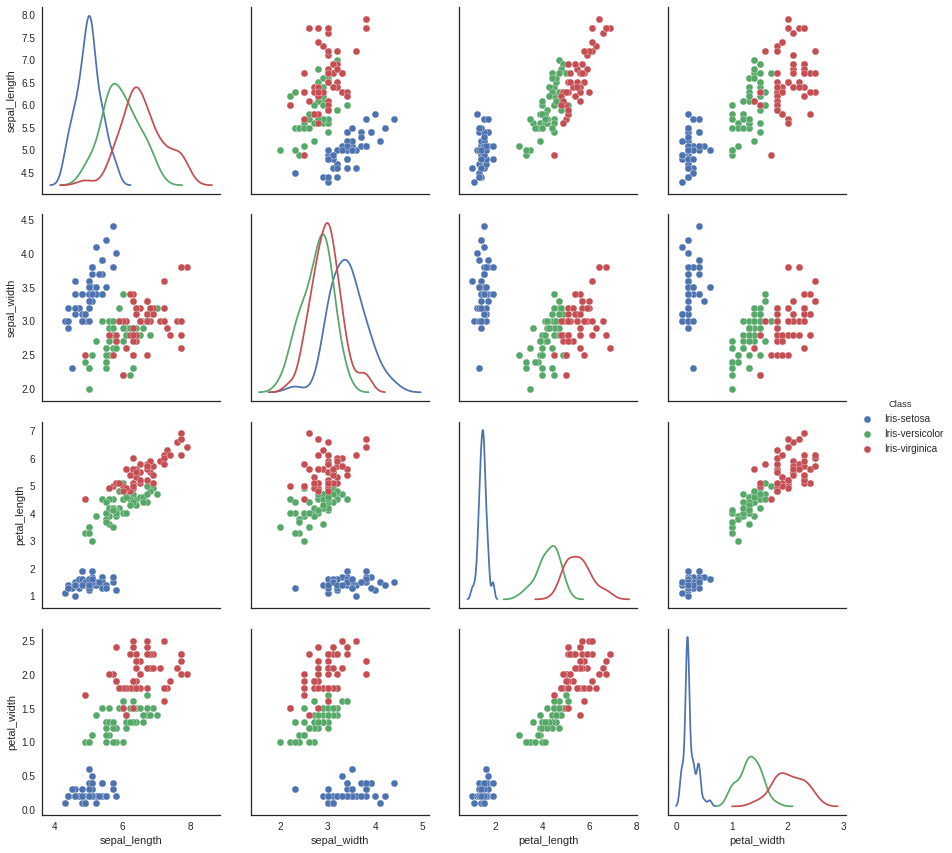

In [11]:
#Multivariate plots
sns.pairplot(df, hue = 'Class', size =3,diag_kind = 'kde')

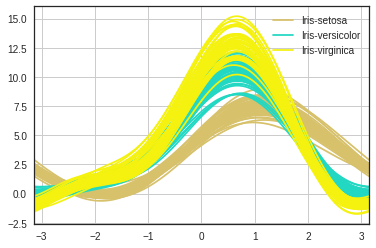

In [12]:
from pandas.plotting import andrews_curves
andrews_curves(df, 'Class')

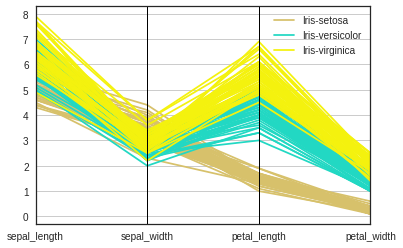

In [13]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(df, 'Class')

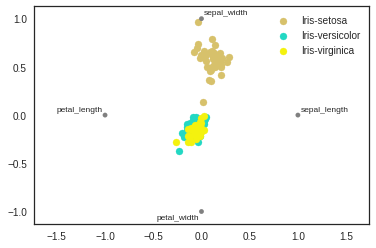

In [14]:
from pandas.plotting import radviz
radviz(df, 'Class')

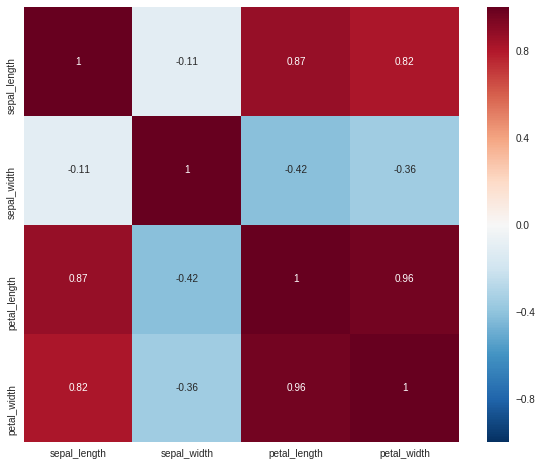

In [15]:
corr = df.corr()
corr
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot = True, square=True, ax=ax)

## Modeling

In [16]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [17]:
#Validation Set
array = df.values
x = array[:,0:4]
y = array[:,4]
validation_size = 0.20
seed = 7
x_train, x_validation, y_train, y_validation = model_selection.train_test_split(x, y, test_size=validation_size, random_state=seed)

Label Encoder

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(y)
#Check encoding
le.transform(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

array([0, 1, 2])

In [19]:
seed = 7
scoring = 'accuracy'

### Feature Importance

In [20]:
# Isolate Data, class labels and column values
names = df.columns.values

# Build the model
rfc = RandomForestClassifier()

# Fit the model
rfc.fit(x, y)

# Print the results
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), names), reverse=True))

Features sorted by their score:
[(0.70309999999999995, 'petal_length'), (0.22800000000000001, 'petal_width'), (0.054899999999999997, 'sepal_length'), (0.013899999999999999, 'sepal_width')]


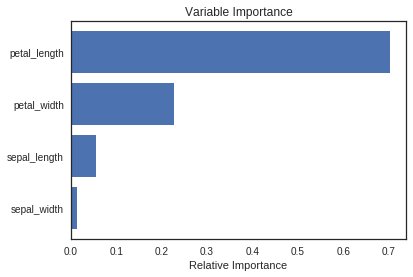

In [21]:
importance = rfc.feature_importances_

# Sort the feature importances 
sorted_importances = np.argsort(importance)

# Insert padding
padding = np.arange(len(names)-1) + 0.5

# Plot the data
plt.barh(padding, importance[sorted_importances], align='center')

# Customize the plot
plt.yticks(padding, names[sorted_importances])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")

# Show the plot
plt.show()

[]

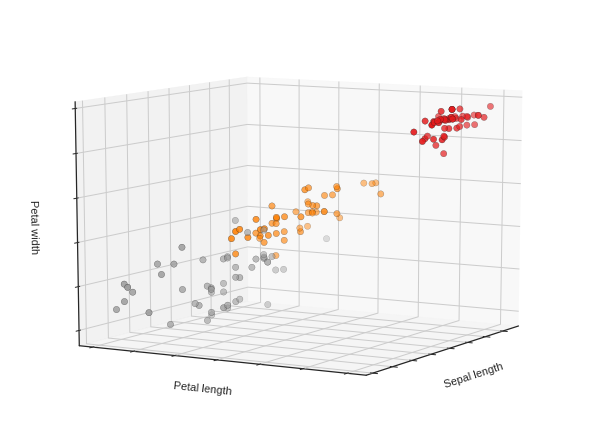

In [22]:
#3D Plot of features with higher importance score

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-170, azim=150)

# Plot the training points
ax.scatter(x[:, 0], x[:, 2],x[:,3], c=Y, cmap=plt.cm.Set1,edgecolor='k', s=40)
ax.set_xlabel('Sepal length')
ax.set_ylabel('Petal length')
ax.set_zlabel('Petal width')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

### Recursive Feature Elimination

In [23]:
model = LogisticRegression()
rfe = RFE(model, 3)
rfe = rfe.fit(x_train,y_train)
print(rfe.support_)
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names), reverse=True))

[False  True  True  True]
[(2, 'sepal_length'), (1, 'sepal_width'), (1, 'petal_width'), (1, 'petal_length')]


[]

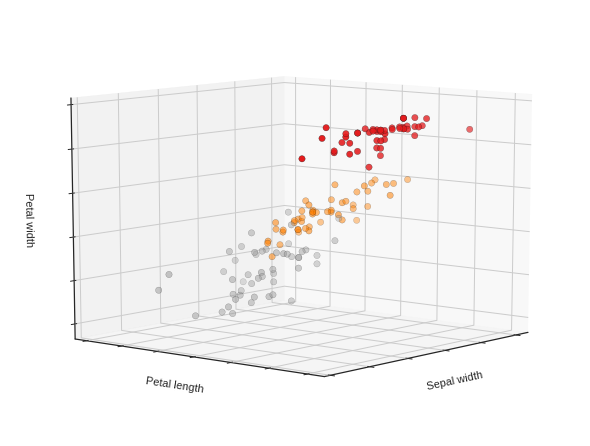

In [24]:
#3D Plot of features with higher importance score

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-170, azim=140)

# Plot the training points
ax.scatter(x[:, 1], x[:, 2],x[:,3], c=Y, cmap=plt.cm.Set1,edgecolor='k', s=40)
ax.set_xlabel('Sepal width')
ax.set_ylabel('Petal length')
ax.set_zlabel('Petal width')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

In [25]:
# Make predictions on validation dataset - Random Forest Classifier
rfc_predictions = rfc.predict(x_validation)
print(accuracy_score(y_validation,rfc_predictions))
print(confusion_matrix(y_validation,rfc_predictions))
print(classification_report(y_validation,rfc_predictions))

0.966666666667
[[ 7  0  0]
 [ 0 12  0]
 [ 0  1 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.92      1.00      0.96        12
 Iris-virginica       1.00      0.91      0.95        11

    avg / total       0.97      0.97      0.97        30



In [26]:
# Make predictions on validation dataset - Logistic Regression
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_predictions = lr.predict(x_validation)
print(accuracy_score(y_validation, lr_predictions))
print(confusion_matrix(y_validation, lr_predictions))
print(classification_report(y_validation, lr_predictions))

0.8
[[ 7  0  0]
 [ 0  7  5]
 [ 0  1 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.88      0.58      0.70        12
 Iris-virginica       0.67      0.91      0.77        11

    avg / total       0.83      0.80      0.80        30



In [27]:
# Make predictions on validation dataset - KNN
knn = KNeighborsClassifier() #default n_neighbors = 5 i.e., classification based on 5 nearest neighbors
knn.fit(x_train, y_train)
knn_predictions = knn.predict(x_validation)
print(accuracy_score(y_validation, knn_predictions))
print(confusion_matrix(y_validation, knn_predictions))
print(classification_report(y_validation, knn_predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30



In [28]:
# Make predictions on validation dataset - Linear Discriminent Analysis
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
lda_predictions = lda.predict(x_validation)
print(accuracy_score(y_validation, lda_predictions))
print(confusion_matrix(y_validation, lda_predictions))
print(classification_report(y_validation, lda_predictions))

0.966666666667
[[ 7  0  0]
 [ 0 11  1]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.92      1.00      0.96        11

    avg / total       0.97      0.97      0.97        30



In [29]:
# Make predictions on validation dataset - Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt_predictions = dt.predict(x_validation)
print(accuracy_score(y_validation, dt_predictions))
print(confusion_matrix(y_validation, dt_predictions))
print(classification_report(y_validation, dt_predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30



In [30]:
# Make predictions on validation dataset - Naive Bayes
nb = GaussianNB()
nb.fit(x_train, y_train)
nb_predictions = nb.predict(x_validation)
print(accuracy_score(y_validation, nb_predictions))
print(confusion_matrix(y_validation, nb_predictions))
print(classification_report(y_validation, nb_predictions))

0.833333333333
[[7 0 0]
 [0 9 3]
 [0 2 9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.82      0.75      0.78        12
 Iris-virginica       0.75      0.82      0.78        11

    avg / total       0.84      0.83      0.83        30



In [31]:
# Make predictions on validation dataset - SVM
svm = SVC()
svm.fit(x_train,y_train)
svm_predictions = svm.predict(x_validation)
print(accuracy_score(y_validation,svm_predictions))
print(confusion_matrix(y_validation,svm_predictions))
print(classification_report(y_validation,svm_predictions))

0.933333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

    avg / total       0.94      0.93      0.93        30



## Algorithm Tuning
### Manual Tuning

([<matplotlib.axis.XTick at 0x7f6c551b36a0>,
 <a list of 10 Text xticklabel objects>)

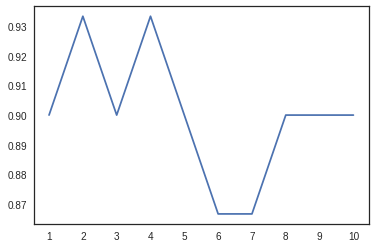

In [32]:
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(x_train,y_train)
    prediction=model.predict(x_validation)
    a=a.append(pd.Series(accuracy_score(y_validation,prediction)))
plt.plot(a_index, a)
plt.xticks(x)

### Grid Search

In [33]:
from sklearn.model_selection import GridSearchCV
parameters = {'C':[10,1,0.1,0.01], 'solver':('newton-cg', 'lbfgs', 'sag')}
model= GridSearchCV(LogisticRegression(), parameters)
model.fit(x_train,y_train)
#print(model.best_score_)
#print(model.best_estimator_)
print(model.best_params_)
lrGCV=pd.DataFrame(model.cv_results_)
lrGCV[['param_C','param_solver','mean_test_score']]

/home/ifb/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ifb/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ifb/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ifb/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ifb/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which 

{'C': 10, 'solver': 'sag'}


/home/ifb/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ifb/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ifb/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ifb/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


,param_C,param_solver,mean_test_score
0,10,newton-cg,0.958333
1,10,lbfgs,0.958333
2,10,sag,0.991667
3,1,newton-cg,0.950000
4,1,lbfgs,0.950000
5,1,sag,0.975000
6,0.1,newton-cg,0.883333
7,0.1,lbfgs,0.883333
8,0.1,sag,0.875000
9,0.01,newton-cg,0.741667


### Model Comparison

In [34]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


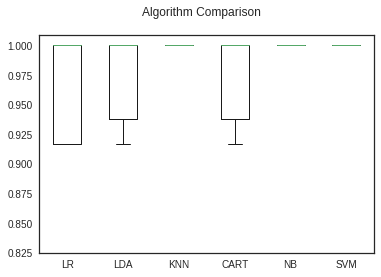

In [35]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Model Deployment

In [37]:
import pickle
output = open('classifier.pkl', 'wb')
pickle.dump(rfc, output)
output.close()

In [38]:
f = open('classifier.pkl', 'rb')
classifier = pickle.load(f)
f.close()

In [39]:
classifier.score(x_validation,y_validation)

0.96666666666666667